In [1]:
import pandas as pd

file_path = "D:\Excelr\Data Science\Data Science Assignment\SVM\SVM\mushroom.csv"
mushroom_df = pd.read_csv(file_path)

mushroom_info = mushroom_df.info()
mushroom_head = mushroom_df.head()
mushroom_description = mushroom_df.describe(include='all')

mushroom_info, mushroom_head, mushroom_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

(None,
    Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
 0        1167    sunken       scaly     white      no  anise      descending   
 1        1037    sunken     fibrous       red      no  anise         notched   
 2         309      flat     grooves    purple     yes   foul      descending   
 3         282      bell       scaly      pink     yes  fishy         notched   
 4         820      flat      smooth    yellow     yes  musty            free   
 
   gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
 0      distant     broad       pink  ...    partial      brown         two   
 1      crowded    narrow  chocolate  ...  universal      brown         two   
 2      crowded     broad     purple  ...  universal     yellow         two   
 3        close     broad     orange  ...    partial     yellow         two   
 4      crowded    narrow     orange  ...  universal      white        none   
 
    ring_type spore_print_col

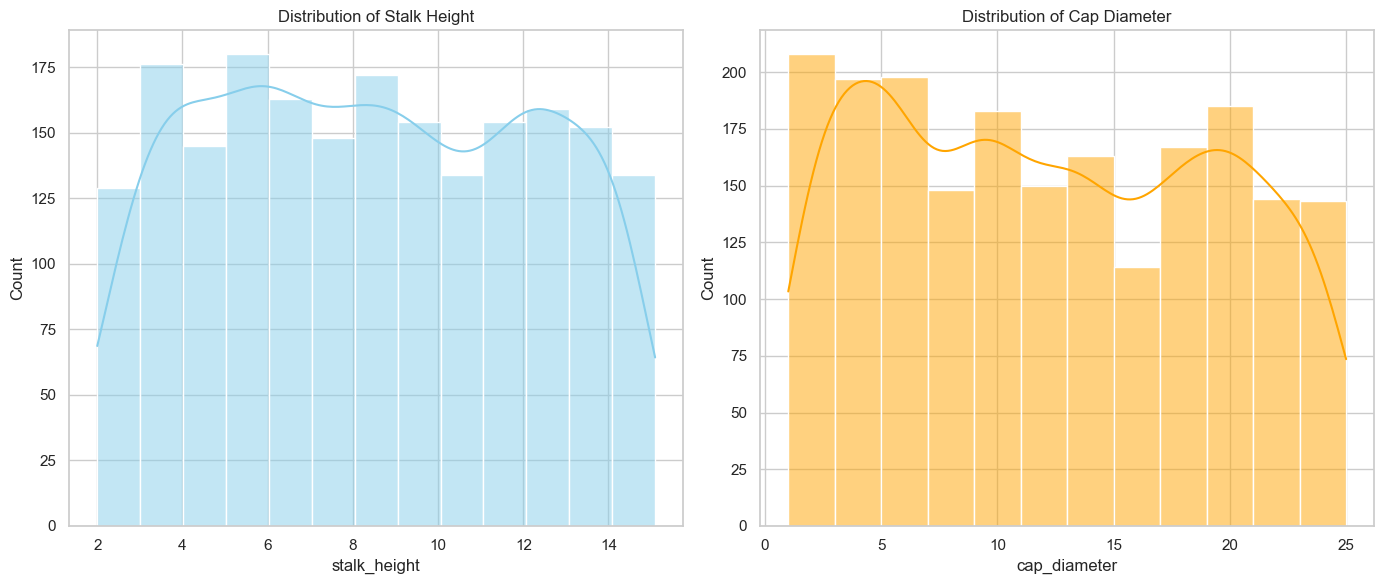

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")
# Plot histograms for numerical features)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Histogram for stalk_height
sns.histplot(mushroom_df['stalk_height'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Stalk Height')
# Histogram for cap_diameter
sns.histplot(mushroom_df['cap_diameter'], kde=True, ax=axes[1], color='orange')
axes[1].set_title('Distribution of Cap Diameter')

plt.tight_layout()
plt.show()

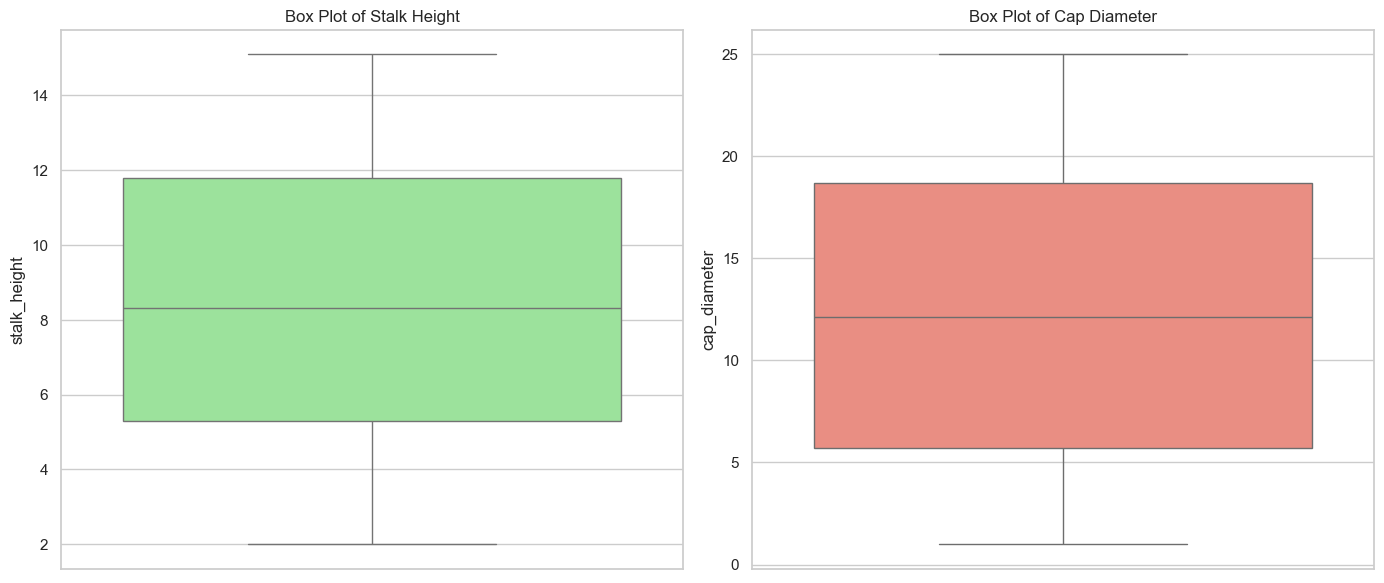

In [3]:
# Boxplots for stalk_height and cap_diameter
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Boxplot for stalk_height
sns.boxplot(y=mushroom_df['stalk_height'], ax=axes[0], color='lightgreen')
axes[0].set_title('Box Plot of Stalk Height')
# Boxplot for cap_diameter
sns.boxplot(y=mushroom_df['cap_diameter'], ax=axes[1], color='salmon')
axes[1].set_title('Box Plot of Cap Diameter')

plt.tight_layout()
plt.show()

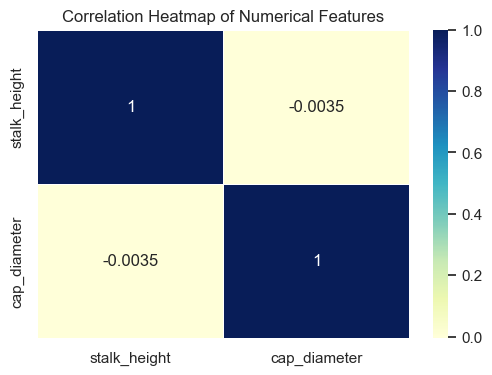

In [4]:
# correlation matrix for the numerical features
correlation_matrix = mushroom_df[['stalk_height', 'cap_diameter']].corr()
# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separate target variable ('class') and features
X = mushroom_df.drop(columns=['class', 'Unnamed: 0'])
y = mushroom_df['class']
# Label encode the target variable (class)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# One-hot encode the categorical features
X_encoded = pd.get_dummies(X, drop_first=True)
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
# Show the shapes of the resulting sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 104), (400, 104), (1600,), (400,))

C:\Users\Admin\AppData\Local\Temp\ipykernel_11616\569465176.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


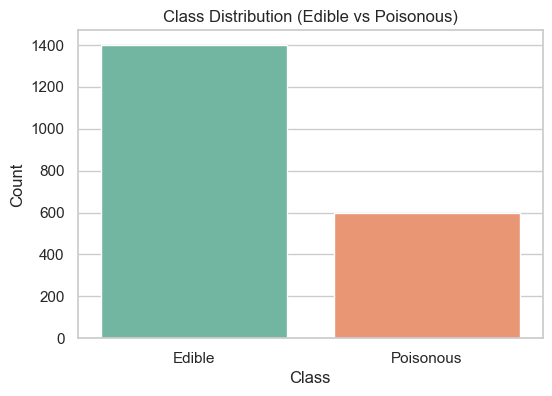

In [6]:
# Plot the class distribution to check for imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="Set2")
plt.title('Class Distribution (Edible vs Poisonous)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Edible', 'Poisonous'])
plt.show()

In [6]:
# Check the data types to ensure all are numeric for the selected features
numerical_features = ['stalk_height', 'cap_diameter']
# Add the target 'class' for color distinction
numerical_data_subset = X_train[numerical_features].copy()
numerical_data_subset['class'] = y_train
numerical_data_subset.dtypes
# Confirm there are no invalid values in the numerical subset
numerical_data_subset.isnull().sum()

stalk_height    0
cap_diameter    0
class           0
dtype: int64

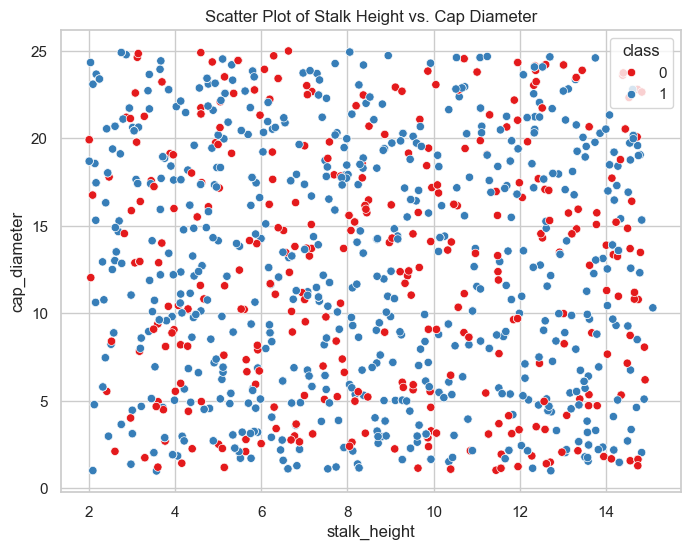

In [10]:
# Scatter plot between stalk_height and cap_diameter, colored by class
plt.figure(figsize=(8, 6))
sns.scatterplot(x='stalk_height', y='cap_diameter', hue='class', data=numerical_data_subset, palette="Set1")
plt.title('Scatter Plot of Stalk Height vs. Cap Diameter')
plt.show()

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
# Train the SVM model on the training data
svm_classifier.fit(X_train, y_train)
# predictions on the test data
y_pred = svm_classifier.predict(X_test)
# model performance
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred, target_names=['Edible', 'Poisonous'])

accuracy, classification_report_output

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

(0.6675,
 '              precision    recall  f1-score   support\n\n      Edible       0.00      0.00      0.00       133\n   Poisonous       0.67      1.00      0.80       267\n\n    accuracy                           0.67       400\n   macro avg       0.33      0.50      0.40       400\nweighted avg       0.45      0.67      0.53       400\n')

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


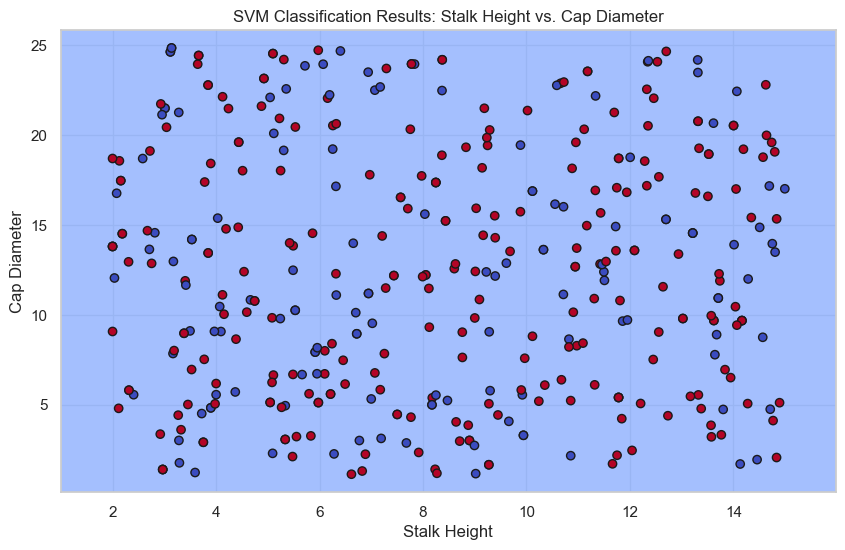

In [8]:
import numpy as np
# mesh grid for the two features
h = 0.02
x_min, x_max = X_test['stalk_height'].min() - 1, X_test['stalk_height'].max() + 1
y_min, y_max = X_test['cap_diameter'].min() - 1, X_test['cap_diameter'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

X_train_num = X_train[['stalk_height', 'cap_diameter']]
X_test_num = X_test[['stalk_height', 'cap_diameter']]
# new SVM classifier
svm_classifier_num = SVC(kernel='linear', random_state=42)
# Train the new SVM model
svm_classifier_num.fit(X_train_num, y_train)
# mesh grid for the two numerical features
Z = svm_classifier_num.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the decision boundary and the test points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_test_num['stalk_height'], X_test_num['cap_diameter'], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('SVM Classification Results: Stalk Height vs. Cap Diameter')
plt.xlabel('Stalk Height')
plt.ylabel('Cap Diameter')
plt.show()

In [12]:
# smaller parameter grid for quicker tuning
from sklearn.model_selection import GridSearchCV
param_grid_reduced = {'C': [0.1, 1, 10],'kernel': ['linear', 'rbf']}
# GridSearchCV with the reduced parameter grid
svm_model = SVC(random_state=42)
grid_search_reduced = GridSearchCV(svm_model, param_grid_reduced, cv=3, scoring='accuracy')
# Perform the grid search on the training set
grid_search_reduced.fit(X_train, y_train)
# best parameters and the best score
best_params_reduced = grid_search_reduced.best_params_
best_score_reduced = grid_search_reduced.best_score_

best_params_reduced, best_score_reduced

({'C': 10, 'kernel': 'rbf'}, 0.7393724542258386)

In [13]:
# different kernels
svm_results = {}
# List of kernels to compare
kernels = ['linear', 'poly', 'rbf']
# Train and evaluate SVM with each kernel
for kernel in kernels:
    # Initialize the SVM classifier with the current kernel
    svm_model = SVC(kernel=kernel, C=10, random_state=42)
    # Train the model
    svm_model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = svm_model.predict(X_test)
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    classification_report_output = classification_report(y_test, y_pred, target_names=['Edible', 'Poisonous'], zero_division=0)
    # Store the results for comparison
    svm_results[kernel] = {'accuracy': accuracy,'report': classification_report_output}

svm_results

{'linear': {'accuracy': 0.6675,
  'report': '              precision    recall  f1-score   support\n\n      Edible       0.00      0.00      0.00       133\n   Poisonous       0.67      1.00      0.80       267\n\n    accuracy                           0.67       400\n   macro avg       0.33      0.50      0.40       400\nweighted avg       0.45      0.67      0.53       400\n'},
 'poly': {'accuracy': 0.6975,
  'report': '              precision    recall  f1-score   support\n\n      Edible       0.65      0.20      0.30       133\n   Poisonous       0.70      0.95      0.81       267\n\n    accuracy                           0.70       400\n   macro avg       0.68      0.57      0.55       400\nweighted avg       0.69      0.70      0.64       400\n'},
 'rbf': {'accuracy': 0.71,
  'report': '              precision    recall  f1-score   support\n\n      Edible       0.71      0.22      0.33       133\n   Poisonous       0.71      0.96      0.81       267\n\n    accuracy               